In [3]:
import sys
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from shapely import  Point
sys.path.append(os.path.abspath('../raw_to_map'))
from im_to_im import load_buildings, main, plot_matches


Load buildings from the raw_to_map project, and calculate the mean position of the vertices. 
The result is a dictionary where the values are mean points of buildings in the image with id given in the dict key.

This repo requires installing and running the init.py script from the raw_to_map repo at https://github.com/Sjyhne/raw_to_map. 

In [4]:
with open('../AgderOst/settings.json') as f:
    settings = json.load(f)
with open('overlap.json') as f:
    overlap = json.load(f)
buildings = load_buildings('../AgderOst/buildings_transformed')

buildings_pt = {iid_adj: set() for iid_adj in overlap.keys()} 
for building in buildings:
    iids = set(building['corners'].keys()).intersection(buildings_pt.keys())
    if iids:
        for iid in iids:
            point = Point(np.round(np.mean(np.array(list(building['corners'][iid])), axis=0), 6))
            buildings_pt[iid].add(point)

100%|██████████| 8465/8465 [01:23<00:00, 101.23it/s]


Loaded 8465 building objects from ../AgderOst/buildings_transformed


"overlap" is a dict where the values are ids om images that overlap with the image with id in the key. 
Below is a reduced overlap dictionary for demonstration purposes

In [6]:
limited_overlap = dict(list(overlap.items())[:5])
for id in limited_overlap:
    new_list = [i for i in limited_overlap[id] if i in limited_overlap.keys()]
    limited_overlap[id] = new_list

for k, v in limited_overlap.items():
    print(f'{k} : {v}')

14583_01_001_20017 : ['14583_01_002_20018', '14583_01_003_20019', '14583_01_004_20020']
14583_01_002_20018 : ['14583_01_001_20017', '14583_01_003_20019', '14583_01_004_20020', '14583_01_005_20021']
14583_01_003_20019 : ['14583_01_001_20017', '14583_01_002_20018', '14583_01_004_20020', '14583_01_005_20021']
14583_01_004_20020 : ['14583_01_001_20017', '14583_01_002_20018', '14583_01_003_20019', '14583_01_005_20021']
14583_01_005_20021 : ['14583_01_002_20018', '14583_01_003_20019', '14583_01_004_20020']


In [8]:
matches, mult_matches = main(limited_overlap, buildings_pt, print_metrics=True, buildings_true=buildings)

20017-20018: Precision:1.0 -- Recall 0.9979 --F1: 0.9989 -- N matches: 475 -- mult match:2

20017-20019: Precision:1.0 -- Recall 1.0 --F1: 1.0 -- N matches: 227 -- mult match:0

20017-20020: Precision:1.0 -- Recall 0.9848 --F1: 0.9923 -- N matches: 130 -- mult match:2

20018-20019: Precision:1.0 -- Recall 0.9919 --F1: 0.9959 -- N matches: 244 -- mult match:0

20018-20020: Precision:1.0 -- Recall 0.9868 --F1: 0.9934 -- N matches: 149 -- mult match:2

20018-20021: Precision:1.0 -- Recall 1.0 --F1: 1.0 -- N matches: 118 -- mult match:0

20019-20020: Precision:1.0 -- Recall 1.0 --F1: 1.0 -- N matches: 357 -- mult match:0

20019-20021: Precision:1.0 -- Recall 0.9969 --F1: 0.9984 -- N matches: 323 -- mult match:0

20020-20021: Precision:1.0 -- Recall 0.9938 --F1: 0.9969 -- N matches: 483 -- mult match:0



Both outputs are lists of dicts, where the key is the id and the value is the coordinate.

`matches` contains successful 1-1 matches, `mult_matches` contains points that are matched with more than one point in the other image

In [12]:
mult_matches

[{'14583_01_001_20017': ((<POINT (4554.464 6521.569)>,
    <POINT (4170.555 6521.503)>),),
  '14583_01_002_20018': (<POINT (807.789 6523.514)>,)},
 {'14583_01_001_20017': ((<POINT (10478.476 1650.518)>,
    <POINT (10786.022 1649.272)>),),
  '14583_01_004_20020': (<POINT (735.821 1674.368)>,)},
 {'14583_01_002_20018': ((<POINT (11104.283 5879.259)>,
    <POINT (13029.862 5871.241)>),),
  '14583_01_004_20020': (<POINT (6428.012 5896.056)>,)}]

{'14583_01_001_20017': <POINT (6248.954 4765)>, '14583_01_002_20018': <POINT (2871.883 4769.152)>}


c:\Users\sigbj\miniconda3\Lib\site-packages\rasterio\__init__.py:368: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


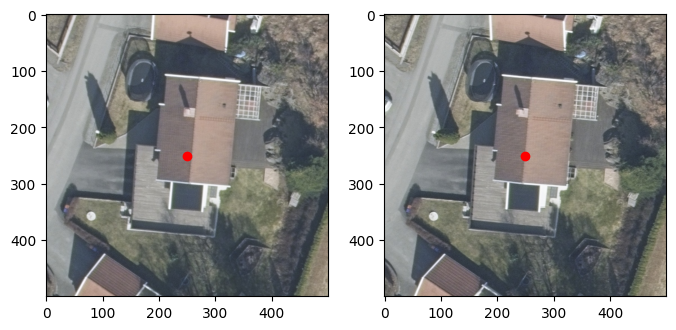

In [11]:
print (matches[0])
cog_path = '../AgderOst/COG'
plot_matches(matches[60], 500, cog_path)